In [3]:
#Plot the test problem
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

#Two Dimensional Test Problem

#Objective function
def objective(x,y):
    return x**2.0+y**2.0

#Define range for the input
r_min, r_max = -1.0, 1.0
#Sample input uniformly at 0.1 increments
x_axis = arange(r_min, r_max, 0.1)
y_axis = arange(r_min, r_max, 0.1)
#Create a mesh from the axis
x, y = meshgrid(x_axis, y_axis)
#Compute targets
z = objective(x,y)
#Create a surfacte plot
figure = pyplot.figure(figsize=[8,6])
axis = figure.gca(projection='3d')
axis.plot_surface(x,y,z,cmap='jet')

pyplot.show()

<Figure size 800x600 with 1 Axes>

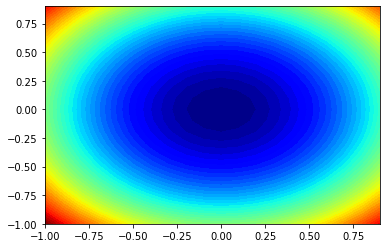

In [4]:
##Creates a contour plot
from numpy import asarray
#Objective function
def objective(x,y):
    return x**2.0+y**2.0

#Define range for the input
bounds = asarray([[-1.0,1.0],[-1.0,1.0]])
#Sample input uniformly at 0.1 increments
x_axis = arange(bounds[0,0], bounds[0,1], 0.1)
y_axis = arange(bounds[0,0], bounds[0,1], 0.1)

#Create a mesh from the axis
x, y = meshgrid(x_axis, y_axis)
#Compute targets
z = objective(x,y)

pyplot.contourf(x,y,z,levels=50,cmap='jet')
pyplot.show()

In [5]:
##Gradient Descent Optimization with Adam

In [6]:
#Gradient optimization algorithm with adam
def adam(objective,derivative,bounds,n_iter,alpha,beta1,beta2,eps=1e-8):
    #Generate an initial point
    x = bounds[:,0]+rand(len(bounds))*(bounds[:,1]-bounds[:,0])
    score = objective(x[0],x[1])
    #Initialize the first and second moments to be zero 
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    #Run the gradient descent updates
    for it in range(n_iter):
        #Calculate gradient
        g = derivative(x[0],x[1])
        for i in range(x.shape[0]):
            #Calculate the first moment
            m[i] = beta1*m[i]+(1-beta1)*g[i]
            #Calculate the second moment
            v[i] = beta2*v[i]+(1-beta2)*g[i]**2.0
            #Bias correction for the first and second moments
            mhat = m[i] / (1.0-beta1**(it+1))
            vhat = v[i] / (1.0-beta2**(it+1))
            
            #Update variable
            x[i] = x[i]-alpha*mhat/(sqrt(vhat)+eps)
        
        #Evaluate candidate point
        score = objective(x[0],x[1])
        #Report progress
        print('->%d f(%s) = %.5f' %(it, x, score))
    return [x,score]

In [24]:
#Main script
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import time

#Objective function
def objective(x,y):
    return x**2.0+y**2.0

#Derivative of objective function
def derivative(x,y):
    return asarray([x*2.0,y*2.0])

#Gradient optimization algorithm with adam
def adam(objective,derivative,bounds,n_iter,alpha,beta1,beta2,eps=1e-8):
    solutions = list()
    #Generate an initial point
    x = bounds[:,0]+rand(len(bounds))*(bounds[:,1]-bounds[:,0])
    score = objective(x[0],x[1])
    #Initialize the first and second moments to be zero 
    m = np.array([0.0 for _ in range(bounds.shape[0])])
    v = np.array([0.0 for _ in range(bounds.shape[0])])
    #Run the gradient descent updates
    for it in range(n_iter):
        #Calculate gradient
        g = derivative(x[0],x[1])
        g = np.array(g)
        #Calculate the first moment
        m = beta1*m+(1-beta1)*g
        #Calculate the second moment
        v = beta2*v+(1-beta2)*g**2.0
        #Bias correction for the first and second moments
        mhat = m/(1.0-beta1**(it+1))
        vhat = v/(1.0-beta2**(it+1))
        #Update variable
        x = x-alpha*mhat/(vhat**(0.5)+eps)
        
        #Evaluate candidate point
        score = objective(x[0],x[1])
        #Save solution at each iteration
        solutions.append(x.copy())
        #Report progress
        print('->%d f(%s) = %.5f' %(it, x, score))
    return x,score,solutions

#Seed the pseudo random number generator
seed(1)
#Define range for the input
bounds = asarray([[-1.0,1.0],[-1.0,1.0]])
#Define the number of iterations
n_iter=60
#Learning rate
alpha = 0.02
#Factor for average gradient
beta1 = 0.8
#Factor for average squared gradient
beta2=0.999
#Perform gradient descent optimization with adam
start = time.time()
best_x, score, solutions = adam(objective,derivative,bounds,n_iter,alpha,beta1,beta2)
finish=time.time()
print('Optimization finished')
print('f(%s) = %f' %(best_x, score))

->0 f([-0.14595599  0.42064899]) = 0.19825
->1 f([-0.12613855  0.40070573]) = 0.17648
->2 f([-0.10665938  0.3808601 ]) = 0.15643
->3 f([-0.08770234  0.3611548 ]) = 0.13812
->4 f([-0.06947941  0.34163405]) = 0.12154
->5 f([-0.05222756  0.32234308]) = 0.10663
->6 f([-0.03620086  0.30332769]) = 0.09332
->7 f([-0.02165679  0.28463383]) = 0.08149
->8 f([-0.00883663  0.26630707]) = 0.07100
->9 f([0.00205801 0.24839209]) = 0.06170
->10 f([0.01088844 0.23093228]) = 0.05345
->11 f([0.01759677 0.2139692 ]) = 0.04609
->12 f([0.02221425 0.19754214]) = 0.03952
->13 f([0.02485859 0.18168769]) = 0.03363
->14 f([0.02572196 0.16643933]) = 0.02836
->15 f([0.02505339 0.15182705]) = 0.02368
->16 f([0.02313917 0.13787701]) = 0.01955
->17 f([0.02028406 0.12461125]) = 0.01594
->18 f([0.01679451 0.11204744]) = 0.01284
->19 f([0.01296436 0.10019867]) = 0.01021
->20 f([0.00906264 0.08907337]) = 0.00802
->21 f([0.00532366 0.07867522]) = 0.00622
->22 f([0.00193919 0.06900318]) = 0.00477
->23 f([-0.00094677  0.060

In [25]:
finish-start

0.011926889419555664

In [14]:
m = np.array([0.0 for _ in range(bounds.shape[0])])
v = np.array([0.0 for _ in range(bounds.shape[0])])

In [16]:
beta1*m+(1-beta1)*g

array([0., 0.])

In [20]:
g = np.array([2,3])
g**2.0

array([4., 9.])

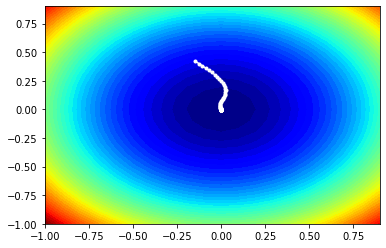

In [9]:
#Visualization of the optimization algorithm
#Sample input uniformly at 0.1 increments
x_axis = arange(bounds[0,0], bounds[0,1], 0.1)
y_axis = arange(bounds[0,0], bounds[0,1], 0.1)

#Create a mesh from the axis
x, y = meshgrid(x_axis, y_axis)
#Compute targets
z = objective(x,y)

pyplot.contourf(x,y,z,levels=50,cmap='jet')
solutions = asarray(solutions)
pyplot.plot(solutions[:,0],solutions[:,1],'.-',color='w')
pyplot.show()